In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
from analyse_scribbles import load_dice_score, plot_influence, image_to_num

In [3]:
df = load_dice_score('./Random_Scribble/' + 'tiger' + '/diceScores.csv')
df.head()

,ScribbleId,image,d,n,AveraDiceScore
0,tiger_d_10_n_1000_k_0,tiger,10,1000,0.550823
1,tiger_d_10_n_1000_k_1,tiger,10,1000,0.556924
2,tiger_d_10_n_1000_k_2,tiger,10,1000,0.559625
3,tiger_d_10_n_1000_k_3,tiger,10,1000,0.559487
4,tiger_d_10_n_1000_k_4,tiger,10,1000,0.534563


In [4]:
df_girafe = load_dice_score('./Random_Scribble/girafe/diceScores.csv')
df_girafe.head()

,ScribbleId,image,d,n,AveraDiceScore
0,girafe_d_20_n_1000_k_0,girafe,20,1000,0.970820
1,girafe_d_20_n_1000_k_1,girafe,20,1000,0.972987
2,girafe_d_20_n_1000_k_2,girafe,20,1000,0.974970
3,girafe_d_20_n_1000_k_3,girafe,20,1000,0.977078
4,girafe_d_20_n_1000_k_4,girafe,20,1000,0.974254


## Impact de n

Correlations:

d                -0.595094
n                 0.077753
AveraDiceScore    1.000000
Name: AveraDiceScore, dtype: float64


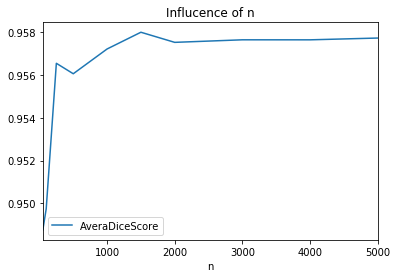

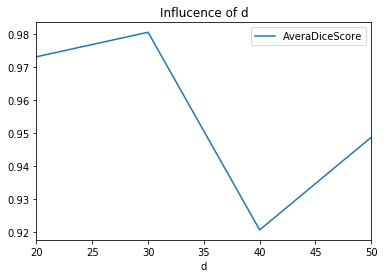

In [5]:
plot_influence(df_girafe)

- Plus la distance augmente plus les scores sont faibles : Normal
- Impact très faible du nombre de scribbles

## Tiger

Correlations:

d                -0.169446
n                 0.227478
AveraDiceScore    1.000000
Name: AveraDiceScore, dtype: float64


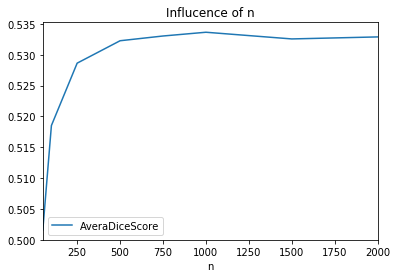

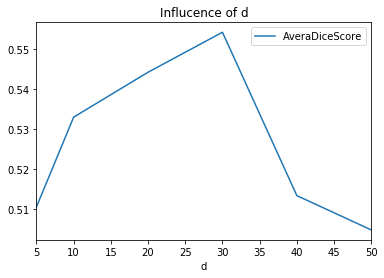

In [6]:
df_2 = load_dice_score('./Random_Scribble/tiger/diceScores.csv')
plot_influence(df_2)

Correlations:

d                -0.313511
n                -0.227007
AveraDiceScore    1.000000
Name: AveraDiceScore, dtype: float64


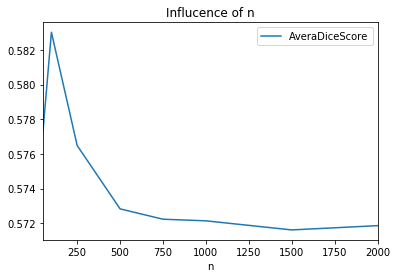

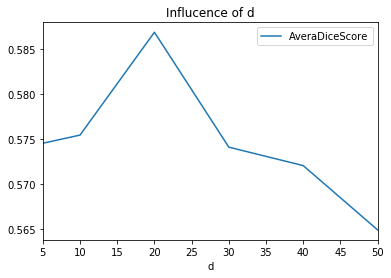

In [24]:
df_kang = load_dice_score('./Random_Scribble/kangourou/diceScores.csv')
#df_kang['score'] = 1 - df_kang['AveraDiceScore'] 
plot_influence(df_kang)

Correlations:

d                -0.896647
n                -0.009954
AveraDiceScore    1.000000
Name: AveraDiceScore, dtype: float64


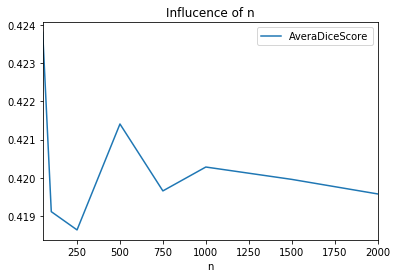

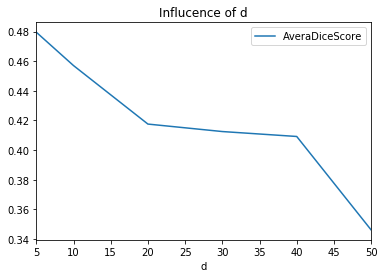

In [25]:
df_wolf = load_dice_score('./Random_Scribble/wolf/diceScores.csv')
plot_influence(df_wolf)

# Sur toutes les images

In [9]:
names = ['girafe', 'wolf', 'kangourou', 'tiger']

In [10]:
df = load_dice_score('./Random_Scribble/' + names[0] + '/diceScores.csv')
for image_name in names[1:]:
    df_aux = load_dice_score('./Random_Scribble/' + image_name + '/diceScores.csv')
    df = pd.concat([df, df_aux])

In [27]:
df.groupby(by=['image'])['AveraDiceScore'].mean()

image
girafe       0.955690
kangourou    0.574672
tiger        0.526645
wolf         0.420305
Name: AveraDiceScore, dtype: float64

Correlations:

d                 0.152623
n                 0.369050
AveraDiceScore    1.000000
Name: AveraDiceScore, dtype: float64


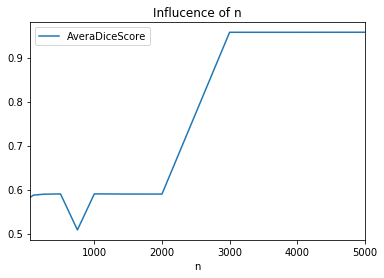

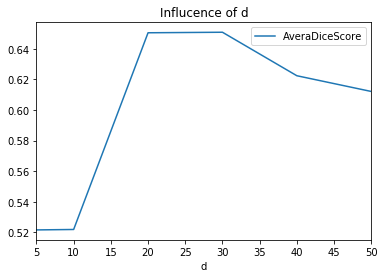

In [12]:
plot_influence(df)

In [13]:
df.corr()['AveraDiceScore']

d                 0.152623
n                 0.369050
AveraDiceScore    1.000000
Name: AveraDiceScore, dtype: float64

Grosse influence à l'image : Normal

# More data 

In [19]:
df_more = load_dice_score('diceScores.csv')
df_more['score'] = 1 - df_more['AveraDiceScore']
df_more.describe()

,Classe0,Classe1,d,n,AveraDiceScore,score
count,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000
mean,0.213552,0.484640,26.219880,894.327309,0.349096,0.650904
std,0.028988,0.015770,16.032092,657.378263,0.011365,0.011365
min,0.058389,0.463856,5.000000,50.000000,0.279355,0.620607
25%,0.195568,0.472371,10.000000,250.000000,0.342356,0.643511
50%,0.222168,0.477383,30.000000,750.000000,0.352465,0.647535
75%,0.233443,0.493616,40.000000,1500.000000,0.356489,0.657645
max,0.259877,0.565042,50.000000,2000.000000,0.379393,0.720645


Correlations:

Classe0          -0.841006
Classe1           0.104550
d                -0.493220
n                -0.277298
AveraDiceScore   -1.000000
score             1.000000
Name: score, dtype: float64


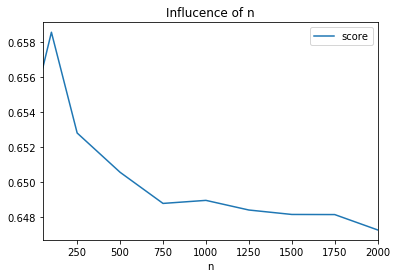

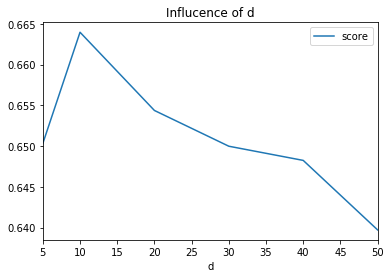

In [21]:
plot_influence(df_more, name_score='score')